# Book Crossing
[Book Crossing](http://www2.informatik.uni-freiburg.de/~cziegler/BX/) Dataset was collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books. 

The dataset used here is ***Preprocessed_data.csv*** from [Kaggle](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset) which included features: Category, Language, Summary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import cuid
import functions as f

In [3]:
usecols = ['user_id', 'age', 'isbn', 'rating', 'book_title', 'book_author','img_m', 'Summary', 'year_of_publication','Category', 'Language', 'country' ]
df_ratings = pd.read_csv('./data/Preprocessed_data.csv', usecols=usecols)
print(df_ratings.shape)
df_ratings = df_ratings[df_ratings['rating'] != 0] #remove implicit rating


(1031175, 12)


In [4]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(df_ratings), len(df_ratings['isbn'].unique()), len(df_ratings['user_id'].unique())))

Number of ratings: 383852
Number of books: 149842
Number of users: 68092


## Data Preprocessing

In [5]:
def parse_list(x:str):
    lst = x.strip('][').split('\', ')
    return list(map(lambda x: x.strip('\''), lst))
            
df_ratings.drop(index=df_ratings[df_ratings['Category'] == '9'].index, inplace=True) #remove 9 in category
df_ratings['Category'] = df_ratings['Category'].apply(parse_list)
print(df_ratings.shape)
df_ratings.sample(5)

(231585, 12)


,user_id,age,isbn,rating,book_title,book_author,year_of_publication,img_m,Summary,Language,Category,country
419729,99086,27.0000,0330415557,3,All American Girl,Meg Cabot,2003.0,http://images.amazon.com/images/P/0330415557.0...,Sam Madison never knew life could change overn...,en,[Children of presidents],italy
67423,167587,22.0000,0446531332,4,Nights in Rodanthe,Nicholas Sparks,2002.0,http://images.amazon.com/images/P/0446531332.0...,After her husband leaves her for a younger wom...,en,[Fiction],NaN
28583,43246,36.0000,0312305060,7,The Hours: A Novel,Michael Cunningham,2002.0,http://images.amazon.com/images/P/0312305060.0...,"By the end of the novel, these three stories i...",en,[Fiction],canada
302382,7947,34.7439,0684801051,9,TIME AND AGAIN,Jack Finney,1995.0,http://images.amazon.com/images/P/0684801051.0...,Simon Morley is selected by a secret governmen...,en,[Fiction],usa
140632,142524,36.0000,0553288202,9,The Fall of Hyperion,Dan Simmons,1991.0,http://images.amazon.com/images/P/0553288202.0...,"Henry is generally well-behaved, but he is occ...",en,[Fiction],usa


In [6]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d\nNumber of Language: %d\nNumber of Countries: %d' % (len(df_ratings), len(df_ratings['isbn'].unique()), len(df_ratings['user_id'].unique()), len(df_ratings['Language'].unique()), len(df_ratings['country'].unique())))

Number of ratings: 231585
Number of books: 80852
Number of users: 49363
Number of Language: 26
Number of Countries: 281


# Data seperation

In [7]:
books = df_ratings[['book_title', 'book_author', 'img_m', 'Summary','isbn', 'year_of_publication','Language', 'Category']].drop_duplicates(['book_title'])
print(books.shape)
books.head(5)

(75648, 8)


,book_title,book_author,img_m,Summary,isbn,year_of_publication,Language,Category
1,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",0002005018,2001.0,en,[Actresses]
16,Decision in Normandy,Carlo D'Este,http://images.amazon.com/images/P/0060973129.0...,"Here, for the first time in paperback, is an o...",0060973129,1991.0,en,[1940-1949]
19,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,http://images.amazon.com/images/P/0374157065.0...,"Describes the great flu epidemic of 1918, an o...",0374157065,1999.0,en,[Medical]
31,The Kitchen God's Wife,Amy Tan,http://images.amazon.com/images/P/0399135782.0...,A Chinese immigrant who is convinced she is dy...,0399135782,1991.0,en,[Fiction]
64,What If?: The World's Foremost Military Histor...,Robert Cowley,http://images.amazon.com/images/P/0425176428.0...,"Essays by respected military historians, inclu...",0425176428,2000.0,en,[History]


In [8]:
books_by_Category = books.explode("Category").groupby("Category")
# # sort by count
category_counts_sorted = books_by_Category['isbn'].count().sort_values(ascending=False)
top_categories = category_counts_sorted[:50]
top_categories.index
# Filter the DataFrame to only keep rows where at least one category is in the top categories
df_top_books = books[books['Category'].apply(lambda x: any(item for item in x if item in top_categories.index))]
df_top_books.shape

(63948, 8)

In [9]:
df_top_books.sample(5)

,book_title,book_author,img_m,Summary,isbn,year_of_publication,Language,Category
266976,Touchpoints: Your Child's Emotional and Behavi...,T. Berry Brazelton,http://images.amazon.com/images/P/020162690X.0...,Dr. Brazelton uses them as windows to help par...,020162690X,1992.0,en,[Psychology]
468460,"Dated Jekyll, Married Hyde",Laura Jensen Walker,http://images.amazon.com/images/P/1556619952.0...,Christian Library of Lancaster Collection.,1556619952,1997.0,en,[Family & Relationships]
604292,The Kadin,Bertrice Small,http://images.amazon.com/images/P/0380016990.0...,"Abducted from a life of privilege, she was sol...",0380016990,1978.0,en,[Fiction]
541233,Naked Prey,John Sandford,http://images.amazon.com/images/P/0399150439.0...,"There is worse to come-much, much worse. Fille...",0399150439,2003.0,en,[Fiction]
685465,Plays Unpleasant: Widowers' Houses/the Philand...,Bernard Shaw,http://images.amazon.com/images/P/0140437932.0...,Presents three plays that dramatize social pro...,0140437932,2001.0,en,[Drama]


In [10]:
df_author = df_top_books[["book_author"]].drop_duplicates("book_author")
# df_author['first_name'] = df_author.apply(lambda row: row.book_author.split(maxsplit=1)[0], axis=1)

# df_author['last_name'] = df_author.apply(lambda row: row.book_author.split(maxsplit=1)[-1], axis=1)
df_author.shape
df_author["author_id"] = df_author.apply(lambda row: cuid.cuid(), axis=1)
df_author.sample(5)


,book_author,author_id
593963,Chris Offutt,cli70dwou080ntkkripy2xbrx
540192,James R. Lewis,cli70dwoa06jjtkkr6ditxvhv
192013,Molly Rice,cli70dwm201g3tkkr7xyonb33
1024920,Jack Hanson,cli70dwvs0p4atkkrh3rqpj2d
1023026,C.G. Jung,cli70dwvq0oz5tkkrh6wedair


In [11]:
# Merge the two DataFrames on the 'author_name' column
df_top_books = pd.merge(df_top_books, df_author, on='book_author')

In [12]:
df_top_books.sample(5)

,book_title,book_author,img_m,Summary,isbn,year_of_publication,Language,Category,author_id
39345,Painted Birdhouses,Plaid,http://images.amazon.com/images/P/0806913452.0...,Twenty nine projects with all the patterns and...,0806913452,1998.0,en,[Crafts & Hobbies],cli70dwpi09rgtkkrb5iawsl7
50135,Baby Signs,Linda Acredolo,http://images.amazon.com/images/P/0809234300.0...,How to talk with your baby before your baby ca...,0809234300,1996.0,en,[Family & Relationships],cli70dwrz0fv9tkkr4e8s3pg2
6391,Le Mythe De Sisyphe Essai Sur Labsurde (Collec...,Albert Camus,http://images.amazon.com/images/P/2070322882.0...,"L&#39;absurde, le suicide, etc. Premier essai ...",2070322882,1999.0,fr,[Foreign Language Study],cli70dwlo00kytkkrc3wlv4al
61597,The Cheese Plate,Max McCalman,http://images.amazon.com/images/P/0609604961.0...,Describes the unique characteristics and taste...,0609604961,2002.0,en,[Cooking],cli70dwv80no8tkkrbycclhjq
27429,"Guardian of the Trust (Merlins Descendants, No 2)",Irene Radford,http://images.amazon.com/images/P/0886779952.0...,"In the sequel to Guardian of the Balance, Lord...",0886779952,2001.0,en,[Fiction],cli70dwno04z7tkkrwy55uatb


In [13]:
df_ratings['updated_rating'] = df_ratings.apply(lambda row: (row.rating + 1) //2,axis=1)
df_avg_ratings = df_ratings.groupby('isbn')['updated_rating'].mean()

In [14]:
df_avg_ratings.sample(5)

isbn
0345315758    4.5
0843950951    3.6
0553580329    3.5
0231109245    4.0
0385333838    3.0
Name: updated_rating, dtype: float64

In [15]:
df_top_books = df_top_books.merge(df_avg_ratings,on='isbn', how='left')

In [16]:
from typing import List


categoriesMapping = {
    "Fiction": ["novel"],
    "Juvenile Fiction": ["novel", "children"], 
    "Biography & Autobiography": ["biography"], 
    "History": ["history"],
    "Religion": ["religion"],
    "Juvenile Nonfiction": ["children"],
    "Social Science": ["social_sciences"], 
    "Humor": ["humor"],
    "Body, Mind & Spirit": ["religion"],
    "Business & Economics": ["business"], 
    "Cooking": ["cookbooks"],
    "Health & Fitness": ["health"], 
    "Family & Relationships": ["relationships"],
    "Computers": ["science"], 
    "Travel": ["travel"],
    "Self-Help": ["self_help"],
    "Psychology": ["psychology"],
    "Science": ["science"],
    "Poetry": ["poetry"], 
    "Art": ["art"],
    "Literary Criticism": ["literature"], 
    "Nature": ["nature"],
    "Philosophy": ["philosophy"],
    "Reference": ["education"],
    "Performing Arts": ["art"],
    "Drama": ["literature"], 
    "Sports & Recreation": ["sports"], 
    "Political Science": ["politics"],
    "Comics & Graphic Novels": ["comics"],
    "Crafts & Hobbies": ["crafts"],
    "Language Arts & Disciplines": ["art", "education"],
    "Education": ["education"],
    "True Crime": ["mystery"],
    "Music": ["art"],
    "Pets": ["relationships", "crafts"],
    "Gardening": ["nature", "crafts"],
    "Literary Collections": ["literature"],
    "Detective and mystery stories": ["mystery"],
    "Medical": ["medical"],
    "Foreign Language Study": ["education"],
    '"Children\'s stories"': ["children"],
    "House & Home": ["crafts"],
    "Technology & Engineering": ["tech", "science"],
    "Photography": ["art"],
    "Animals": ["nature"],
    "Games & Activities": ["sports"],
    "Games": ["sports"],
    "Architecture": ["art"],
    "Adventure stories": ["novel"],
    "Law": ["law"]
}
def convertCategories(lst: List[str]):
    res = set()
    for item in lst:
        if item in categoriesMapping:
            res.update(categoriesMapping[item])
        else:
            res.update(["others"])
    return list(res)
top_categories.index

Index(['Fiction', 'Juvenile Fiction', 'Biography & Autobiography', 'History',
       'Religion', 'Juvenile Nonfiction', 'Social Science', 'Humor',
       'Body, Mind & Spirit', 'Business & Economics', 'Cooking',
       'Health & Fitness', 'Family & Relationships', 'Computers', 'Travel',
       'Self-Help', 'Psychology', 'Science', 'Poetry', 'Art',
       'Literary Criticism', 'Nature', 'Philosophy', 'Reference',
       'Performing Arts', 'Drama', 'Sports & Recreation', 'Political Science',
       'Comics & Graphic Novels', 'Crafts & Hobbies',
       'Language Arts & Disciplines', 'Education', 'True Crime', 'Music',
       'Pets', 'Gardening', 'Literary Collections',
       'Detective and mystery stories', 'Medical', 'Foreign Language Study',
       '"Children's stories"', 'House & Home', 'Technology & Engineering',
       'Photography', 'Animals', 'Games & Activities', 'Games', 'Architecture',
       'Adventure stories', 'Law'],
      dtype='object', name='Category')

In [17]:
df_rating_tops = df_ratings[df_ratings['isbn'].isin(df_top_books['isbn'])]
print(df_rating_tops.shape)
df_rating_tops.columns

(187199, 13)


Index(['user_id', 'age', 'isbn', 'rating', 'book_title', 'book_author',
       'year_of_publication', 'img_m', 'Summary', 'Language', 'Category',
       'country', 'updated_rating'],
      dtype='object')

In [57]:
from faker import Faker
fake = Faker()
df_users = df_rating_tops[['user_id', 'age', 'country']].drop_duplicates('user_id')
print(df_users.shape)
df_users.sample(5)

(42674, 3)


,user_id,age,country
37346,84426,29.0000,usa
110253,87021,34.7439,canada
440807,194391,24.0000,sweden
425511,184648,34.7439,usa
12363,223501,34.7439,usa


In [58]:
from random import randint, seed
from dateutil.relativedelta import relativedelta
from datetime import date, timedelta
seed(10)
def gen_birthday(age):
    current_date = date.today()
    birth_date = current_date - relativedelta(years=int(age))
    random_birthday = birth_date + relativedelta(days=randint(0, 365))
    return random_birthday

In [59]:
from faker import Faker
Faker.seed(0)
faker = Faker()
first_names = [faker.first_name() for _ in range(df_users.shape[0])]
last_names = [faker.last_name() for _ in range(df_users.shape[0])]

df_users['first_name'] = first_names
df_users['last_name'] = last_names
df_users['username'] =  df_users.apply(lambda row: row.first_name.lower() + '_' + row.last_name.lower(), axis=1)

df_users['email'] =  df_users.apply(lambda row: row.username + '@gmail.com', axis=1)
df_users['birthday'] = df_users['age'].apply(gen_birthday)

In [60]:
print(df_users.shape)
df_users.sample(5)

(42674, 8)


,user_id,age,country,first_name,last_name,username,email,birthday
320096,7180,24.0000,spain,Ashley,Shaffer,ashley_shaffer,ashley_shaffer@gmail.com,2000-02-21
11432,91116,34.7439,usa,Melissa,Ware,melissa_ware,melissa_ware@gmail.com,1990-03-31
133717,10124,50.0000,usa,Brian,Bray,brian_bray,brian_bray@gmail.com,1973-12-23
89556,101349,34.7439,usa,Jeanne,Alexander,jeanne_alexander,jeanne_alexander@gmail.com,1990-01-02
194697,180754,34.7439,usa,Patrick,Garcia,patrick_garcia,patrick_garcia@gmail.com,1990-01-16


In [61]:
print(df_users[df_users['birthday'] == 'i'])

Empty DataFrame
Columns: [user_id, age, country, first_name, last_name, username, email, birthday]
Index: []


## Upload Data to database

In [62]:
import psycopg2
from psycopg2.extras import execute_values

### Load EXTERNAL_AUTHOR

In [63]:

from datetime import datetime
from psycopg2.extras import execute_values
conn = psycopg2.connect(
    dbname='railway',
    user='postgres',
    port='7733',
    password='tpZYz1V9qkIXjix2Ro0D',
    host='containers-us-west-193.railway.app'
)
cur = conn.cursor()
insert_query = """INSERT INTO "public"."User" ("id", "role", "firstName","lastName", "createdAt", "updatedAt", "emailVerified", "disabled", "privacy" ) VALUES %s"""
data = [(author[1], "EXTERNAL_AUTHOR", author[0].split(maxsplit=1)[0], author[0].split(maxsplit=1)[-1], datetime.now(), datetime.now(), False, False, True) for author in df_author.values]
# cur.executemany(insert_query, data)
execute_values(cur, insert_query,data, page_size=1000)
conn.commit()
cur.close()
conn.close()

In [24]:
for author in df_author.sample(5).values:
    print(author[0].split(maxsplit=1))

['Chuck', 'Yeager']
['Ann', 'Rule']
['Cecily', 'Von Ziegesar']
['Sandy', 'Eisenberg Sasso']
['Alan', 'Bell']


### Load Books

In [88]:

from datetime import datetime
from psycopg2.extras import execute_values
from datetime import datetime, timezone, timedelta

timezone_offset = 7.0  # Vietnam Time (UTC+07:00)
tzinfo = timezone(timedelta(hours=timezone_offset))

conn = psycopg2.connect(
    dbname='railway',
    user='postgres',
    port='7733',
    password='tpZYz1V9qkIXjix2Ro0D',
    host='containers-us-west-193.railway.app'
)
cur = conn.cursor()
insert_query = """
    INSERT INTO "public"."Book" 
    ("id", "createdAt", "updatedAt", "name", 
    "coverImage", "description", "languageId", 
    "storyStatus","privacy", "price", 
    "authorId", "sessionsCount", "isDeleted", "avgRating") VALUES %s
    """
data = [(book[4], datetime.now(tzinfo), datetime.now(tzinfo), book[0], book[2],book[3], book[6], "FINISH", False, 0, book[8], randint(1000, 10000), False, book[11] ) for book in df_top_books.values]
# cur.executemany(insert_query, data)
execute_values(cur, insert_query,data, page_size=1000)
conn.commit()
cur.close()
conn.close()

In [87]:
df_top_books.columns

Index(['book_title', 'book_author', 'img_m', 'Summary', 'isbn',
       'year_of_publication', 'Language', 'Category', 'author_id', 'rating_x',
       'rating_y', 'updated_rating'],
      dtype='object')

### Load Categories of Books

In [89]:

from datetime import datetime
from psycopg2.extras import execute_values
conn = psycopg2.connect(
    dbname='railway',
    user='postgres',
    port='7733',
    password='tpZYz1V9qkIXjix2Ro0D',
    host='containers-us-west-193.railway.app'
)
cur = conn.cursor()
insert_query = """
    INSERT INTO "public"."_BookToCategory" 
    ("A", "B") VALUES %s
    """
data = []
for book in df_top_books.values:
    data.extend([(book[4],cat) for cat in convertCategories(book[7])])
execute_values(cur, insert_query,data, page_size=1000)
conn.commit()
cur.close()
conn.close()

### Load Members

In [92]:

from datetime import datetime
from psycopg2.extras import execute_values
conn = psycopg2.connect(
    dbname='railway',
    user='postgres',
    port='7733',
    password='tpZYz1V9qkIXjix2Ro0D',
    host='containers-us-west-193.railway.app'
)
cur = conn.cursor()
insert_query = """
    INSERT INTO "public"."User" (
        "id", 
        "role",
        "createdAt",
        "updatedAt",
        "birthday",
        "firstName",
        "lastName",
        "emailVerified",
        "disabled",
        "privacy",
        "username",
        "email",
        "sessionLimit",
        "dailyLimit",
        "phoneNumber") VALUES %s
"""
# cur.executemany(insert_query, data)
data = [(
        str(user[0]), 
        "MEMBER", 
        datetime.now(), 
        datetime.now(),
        datetime.combine(user[7], datetime.min.time()),
        user[3],
        user[4],
        False,
        False,
        False,
        user[5],
        user[6],
        30,
        120,
        "0123456789"
    ) for user in df_users.values ]
execute_values(cur, insert_query,data, page_size=1000)
conn.commit()
cur.close()
conn.close()

In [91]:
df_users.columns
df_users.sample(5)

,user_id,age,country,first_name,last_name,username,email,birthday
772298,60701,16.0,usa,Amy,Jacobs,amy_jacobs,amy_jacobs@gmail.com,2007-11-01
100590,178026,61.0,usa,Carl,Ramos,carl_ramos,carl_ramos@gmail.com,1962-12-12
60748,244108,41.0,usa,Devon,Anderson,devon_anderson,devon_anderson@gmail.com,1983-01-27
128495,231795,54.0,usa,Jesse,Taylor,jesse_taylor,jesse_taylor@gmail.com,1969-09-05
700510,70238,26.0,germany,Sarah,Smith,sarah_smith,sarah_smith@gmail.com,1997-08-05


### Load Ratings

In [93]:

from datetime import datetime
from psycopg2.extras import execute_values
conn = psycopg2.connect(
    dbname='railway',
    user='postgres',
    port='7733',
    password='tpZYz1V9qkIXjix2Ro0D',
    host='containers-us-west-193.railway.app'
)
cur = conn.cursor()
insert_query = """
    INSERT INTO "public"."Rating" (
        "id",
        "createdAt",
        "updatedAt",
        "rate",
        "userId",
        "bookId",
        "isDeleted") VALUES %s
"""
# cur.executemany(insert_query, data)
data = [(
    cuid.cuid(),
    datetime.now(),
    datetime.now(),
    (rating[3] + 1) // 2,
    rating[0],
    rating[2],
    False
    ) for rating in df_rating_tops.values ]
execute_values(cur, insert_query,data, page_size=1000)
conn.commit()
cur.close()
conn.close()

In [20]:
df_rating_tops.to_csv('data/db_rating.csv',encoding='utf-8', index=False)

6 3
10 5
8 4
8 4
9 5
6 3
9 5
9 5
9 5
9 5
10 5
7 4
10 5
5 3
9 5
7 4
8 4
8 4
7 4
10 5


In [97]:
datas = []
cnt = 0
for book in df_top_books.values:
    datas.extend([(book[4],cat) for cat in convertCategories(book[7])])
    if cnt == 2:
        break
    cnt += 1
print(datas)

[('0374157065', 'medical'), ('0399135782', 'fiction'), ('0399146431', 'fiction')]


In [104]:
df_top_books.columns

Index(['book_title', 'book_author', 'img_m', 'Summary', 'isbn',
       'year_of_publication', 'Language', 'Category', 'author_id'],
      dtype='object')

In [88]:
df_language = df_top_books[["Language"]].drop_duplicates("Language")
df_language.values

array([['en'],
       ['it'],
       ['es'],
       ['de'],
       ['fr'],
       ['ca'],
       ['ru'],
       ['th'],
       ['pt'],
       ['ms'],
       ['gl'],
       ['el'],
       ['la'],
       ['nl'],
       ['da'],
       ['ja'],
       ['zh-TW'],
       ['eo'],
       ['gd'],
       ['zh-CN']], dtype=object)

In [70]:
for author in df_author.values:
    print(author)

['Gina Bari Kolata' 'clhkmoj5r1ew30skrqp0ycrm0']
['Amy Tan' 'clhkmoj5r1ew40skrjs2zyekl']
['Robert Cowley' 'clhkmoj5r1ew50skrcsjyrria']
['Ann Beattie' 'clhkmoj5r1ew60skr6qn18ii0']
['David Adams Richards' 'clhkmoj5r1ew70skrrb6ivhhs']
['Robert Hendrickson' 'clhkmoj5r1ew80skrxvllzdni']
['Julia Oliver' 'clhkmoj5r1ew90skr67evsjz0']
['John Grisham' 'clhkmoj5r1ewa0skr08v8by6y']
['Toni Morrison' 'clhkmoj5r1ewb0skr6or9l1lf']
['The Onion' 'clhkmoj5s1ewc0skrk6ndj2x8']
['Celia Brooks Brown' 'clhkmoj5s1ewd0skrukpmx0ak']
['J. R. Parrish' 'clhkmoj5s1ewe0skrja292ehb']
['Mary-Kate & Ashley Olsen' 'clhkmoj5s1ewf0skryw4kdzea']
['Robynn Clairday' 'clhkmoj5s1ewg0skrsle8jb5m']
['Kathleen Duey' 'clhkmoj5s1ewh0skrdcssxff9']
['Rich Shapero' 'clhkmoj5s1ewi0skr8k4bgyu2']
['Michael Crichton' 'clhkmoj5s1ewj0skr9ks2ejg9']
['MICHAEL CRICHTON' 'clhkmoj5s1ewk0skrzox0yw29']
['Agatha Christie' 'clhkmoj5s1ewl0skryzcd0rt1']
['ISAAC ASIMOV' 'clhkmoj5s1ewm0skrvvno8v5s']
['C.S. Lewis' 'clhkmoj5s1ewn0skrjnm5l3f6']
['ARTHUR PHI

# EDA
Exploratory Data Analysis of the processed dataset. We are looking for some correlation and feature that can affect the ratings, such as book language, user age - book genres

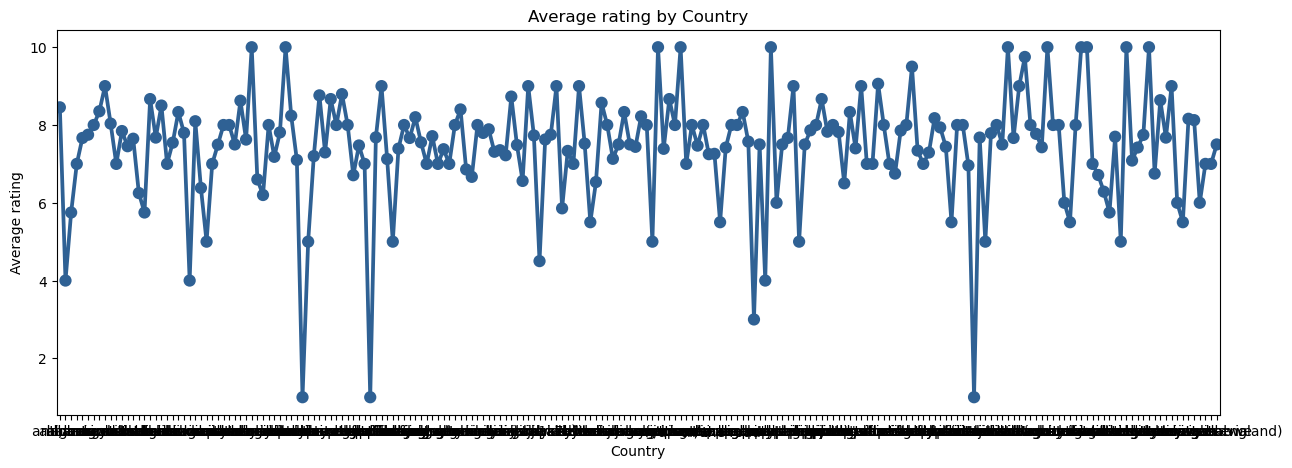

In [7]:
def parse_country(x):
    if isinstance(x,str):
        return x.split(', ')[-1]
    else:
        return 'n/a'
        
df_ratings['country'] = df_ratings['country'].apply(parse_country)
avg_rating_by_Country = df_ratings.groupby('country')['rating'].mean()

# Create the barplot
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x=avg_rating_by_Country.index, y=avg_rating_by_Country.values, color='#2f6194', ax=ax)
ax.set_title('Average rating by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Average rating')
plt.show()

In [61]:

rating_by_Category = df_ratings.explode("Category").groupby("Category")
avg_rating_by_Category = rating_by_Category['rating'].mean()
# # sort by count
category_counts_sorted = rating_by_Category['rating'].count().sort_values(ascending=False)
top_categories = category_counts_sorted[:30]
top_categories


Category
Fiction                        135429
Juvenile Fiction                15062
Biography & Autobiography        9437
Humor                            3934
History                          3354
Religion                         2981
Body, Mind & Spirit              2169
Juvenile Nonfiction              2071
Social Science                   2059
Business & Economics             1902
Family & Relationships           1811
Self-Help                        1742
Health & Fitness                 1597
Cooking                          1377
Travel                           1230
Poetry                           1069
True Crime                       1007
Psychology                       1002
Science                           974
Computers                         945
Literary Criticism                933
Drama                             896
Political Science                 862
Nature                            821
Comics & Graphic Novels           816
Philosophy                        796
Per

In [64]:
# Filter the DataFrame to only keep rows where at least one category is in the top categories
df_top_categories = df_ratings[df_ratings['Category'].apply(lambda x: any(item for item in x if item in top_categories.index))]
df_top_categories.sample(10)


,user_id,age,isbn,rating,book_title,book_author,year_of_publication,img_m,Summary,Language,Category,country
321469,7283,30.0000,0380732033,7,Night Lives On,Walter J. Lord,1998.0,http://images.amazon.com/images/P/0380732033.0...,Why did the nearby ship Californian ignore Tit...,en,[History],usa
76031,11676,34.7439,0425137945,5,Greygallows,Barbara Michaels,1993.0,http://images.amazon.com/images/P/0425137945.0...,When Lucy Cartwright follows her dashing new h...,en,[Fiction],NaN
632573,30276,49.0000,0373613709,7,The Player (Family Secrets),Evelyn Vaughn,2003.0,http://images.amazon.com/images/P/0373613709.0...,The Player by Evelyn Vaughn released on Jul 25...,en,[Fiction],usa
506131,14291,62.0000,0783884397,10,The Case of the Caretaker's Cat (G K Hall Larg...,Erle Stanley Gardner,1998.0,http://images.amazon.com/images/P/0783884397.0...,Perry Mason investigates the well-to-doLaxter ...,en,[Fiction],usa
117903,184140,35.0000,0743457358,6,Everything's Eventual : 14 Dark Tales,Stephen King,2002.0,http://images.amazon.com/images/P/0743457358.0...,King is in terrifying top form in these fourte...,en,[Fiction],canada
722271,218552,48.0000,0786806532,5,Daughters of the Moon: Goddess of the Night - ...,Lynne Ewing,2000.0,http://images.amazon.com/images/P/0786806532.0...,"Vanessa, who has always had the special power ...",en,[Juvenile Fiction],usa
351634,46312,9.0000,059067319X,10,Night in Werewolf Woods (Give Yourself Goosebu...,R. L. Stine,1996.0,http://images.amazon.com/images/P/059067319X.0...,Readers take a camping trip in the woods that ...,en,[Juvenile Fiction],usa
526773,99720,34.7439,0312022824,9,Silence of the Lambs,Thomas Harris,1999.0,http://images.amazon.com/images/P/0312022824.0...,FBI Academy trainee Clarice Starling hopes tha...,en,[Fiction],usa
811538,168245,37.0000,0380978555,10,The Pursuit (Sherring Cross (Hardcover)),Johanna Lindsey,2002.0,http://images.amazon.com/images/P/0380978555.0...,But before she begins her pursuit of a new lif...,en,[Fiction],canada
622310,182085,34.7439,0373765096,10,Cherokee Baby,Sheri Whitefeather,2003.0,http://images.amazon.com/images/P/0373765096.0...,Cherokee Baby by Sheri WhiteFeather released o...,en,[Fiction],germany


C:\Users\DELL\AppData\Local\Temp\ipykernel_6200\2784204424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_categories.loc[:,'age_group'] = pd.cut(df_top_categories['age'], age_groups, labels=age_labels)


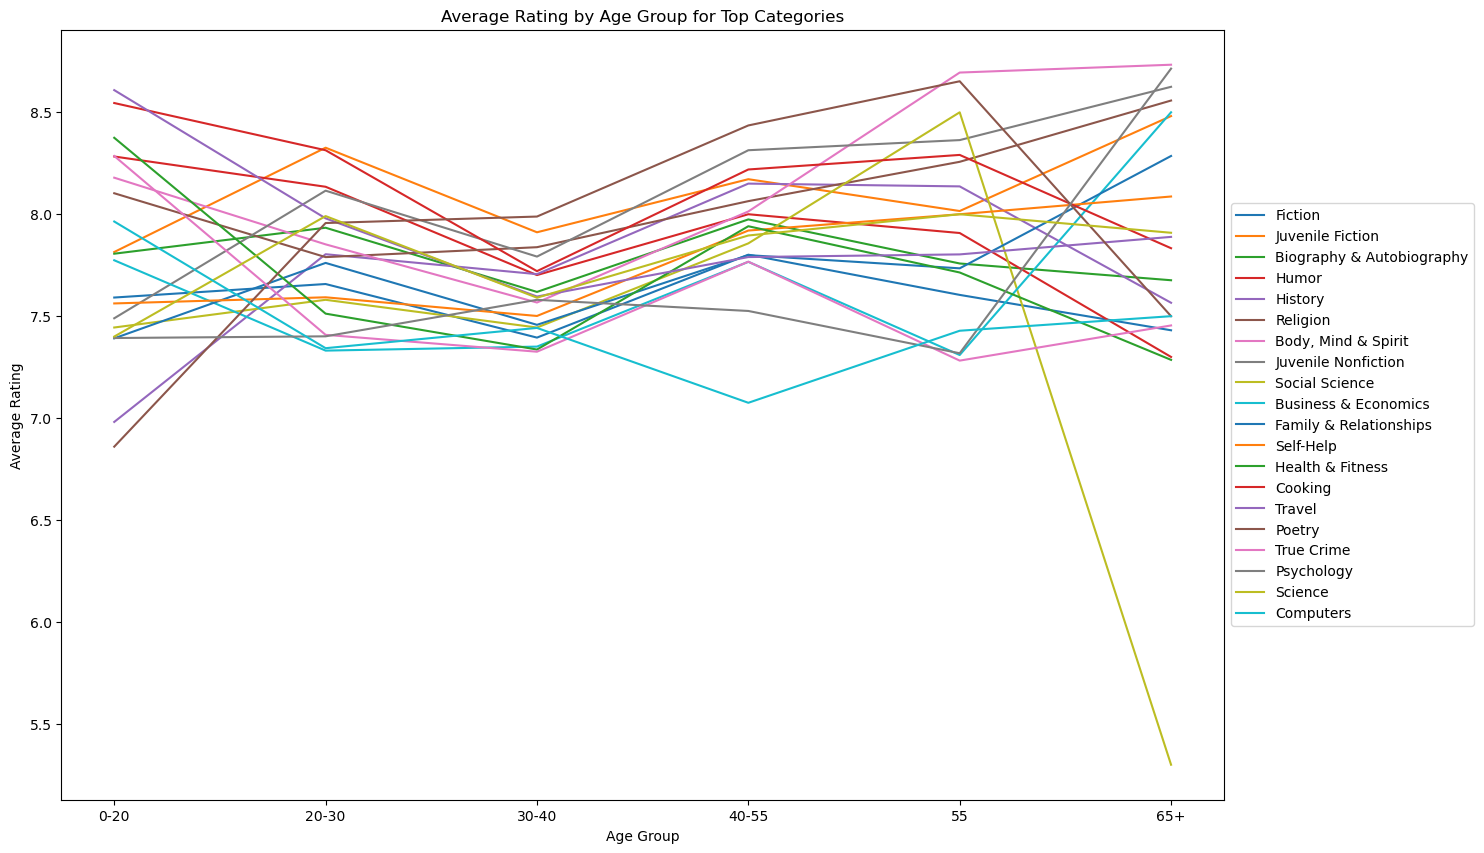

In [10]:
# Define the age groups and corresponding labels
age_groups = [0, 20, 30, 40, 55, 65,100]
age_labels = ['0-20', '20-30','30-40', '40-55', '55', '65+']
df_top_categories.loc[:,'age_group'] = pd.cut(df_top_categories['age'], age_groups, labels=age_labels)
fig, ax = plt.subplots(figsize=(15, 10))
for category in top_categories[:20].index:
# Group the ratings DataFrame by age group and calculate the mean rating
    df_avg_ratings = df_top_categories[df_top_categories['Category'].apply(lambda x: any(item for item in x if item == category))].groupby('age_group')['rating'].mean()

    # Plot the average ratings by age group for the current category
    ax.plot(df_avg_ratings.index, df_avg_ratings.values, label=category)

# Add labels and title to the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating by Age Group for Top Categories')

# Add a legend to the plot
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

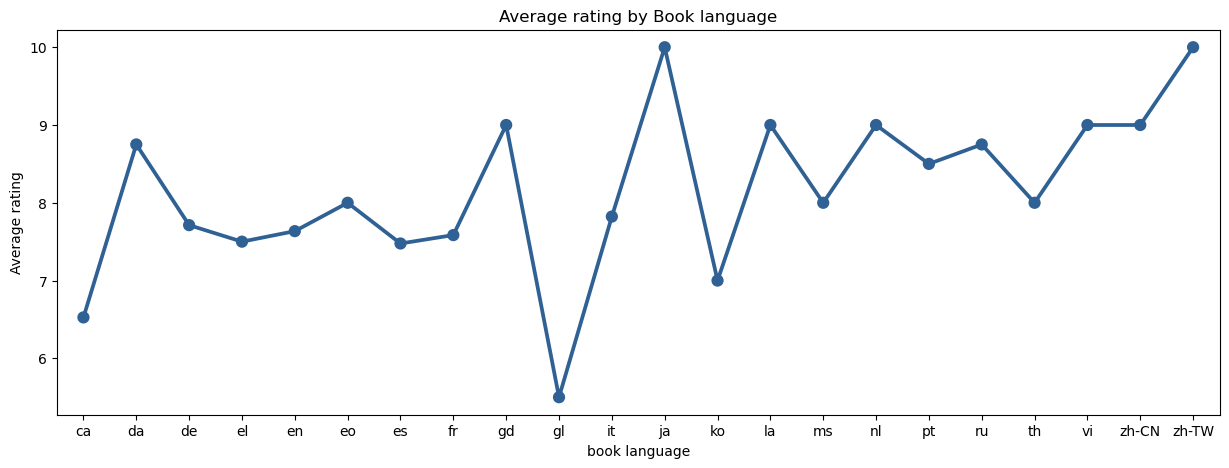

In [11]:
avg_rating_by_Language = df_top_categories.groupby('Language')['rating'].mean()

# Create the barplot
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x=avg_rating_by_Language.index, y=avg_rating_by_Language.values, color='#2f6194', ax=ax)
ax.set_title('Average rating by Book language')
ax.set_xlabel('book language')
ax.set_ylabel('Average rating')
plt.show()

In [65]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(df_ratings),
                                                                           len(df_ratings['isbn'].unique()),
                                                                           len(df_ratings['user_id'].unique())))
print('\nFor top Categories: \nNumber of ratings: %d\nNumber of books: %d\nNumber of users: %d\nNumber of countries: %d' 
                                                                            % (len(df_top_categories),
                                                                           len(df_top_categories['isbn'].unique()),
                                                                           len(df_top_categories['user_id'].unique()),
                                                                           len(df_top_categories['country'].unique())))


Number of ratings: 231585
Number of books: 80852
Number of users: 49363

For top Categories: 
Number of ratings: 198542
Number of books: 63946
Number of users: 44497
Number of countries: 265


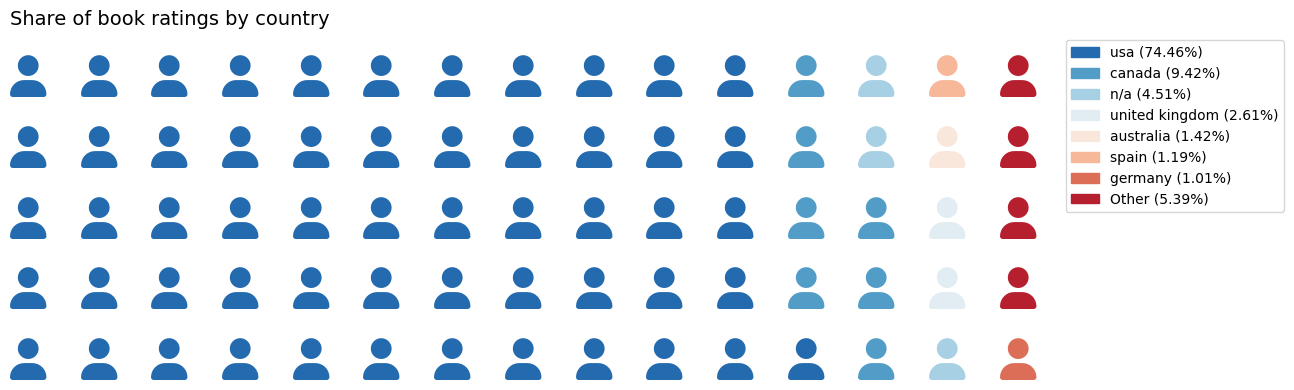

In [13]:
df_users_country = df_top_categories['country'].value_counts(normalize=True).reset_index()
df_users_country.columns = ['country', 'share']
df_users_country.loc[df_users_country['share']<0.01] = 'Other', df_users_country[df_users_country['share']<0.01]['share'].sum()
df_users_country.drop_duplicates(inplace=True)
waffle_data = df_users_country.set_index('country').T.to_dict('records')[0]

fig = plt.figure(
        FigureClass = Waffle,
        figsize = (18,4),
        rows = 5,
        columns = 15,
        values = waffle_data,
        labels = ["%s (%.2f%%)" % (k, v*100) for k, v in waffle_data.items()],
        legend = {
            'loc': 'upper left',
            'bbox_to_anchor': (1, 1)
        },
        colors = sns.color_palette("RdBu_r", len(waffle_data)).as_hex(),
        icons = 'user',
        font_size = 30,
        title = {
            'label': 'Share of book ratings by country',
            'loc': 'left',
            'fontdict': {
                'fontsize': 14
            }
        }
)

plt.show()

In [18]:
df_top_categories.to_csv('data/ratings_top_w_features.csv', encoding='utf-8', index=False)

NameError: name 'df_top_categories' is not defined